# One-dimensional unconditional optimization
### Author: Kirill Zakharov
##### 07.10.2020

In [290]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

## Dichotomy method

In [312]:
#objective function
def f(x):
    return 2*x*x

#Dichotomy method
def dyh(a, b, k):
    array = [] #empty array for roots
    minf = 0
    d = 0.001
    for i in range(k):
        x1 = (a+b-d)/2
        x2 = (a+b+d)/2
        if f(x1) > f(x2): #main condition
            a = x1
            array.append(a)  
        else:
            b = x2
            array.append(b)
        
    minf = (a+b)/2 #result
    return minf, array #the minimum and the list of the roots 

In [311]:
a = widgets.IntText(
    value = -1,
    description="left bound")
display(a)

#количество агентов типа 1
b = widgets.IntText(
    value = 1,
    description="right bound")
display(b)

#количество соседей
k = widgets.IntSlider(
    value=7,
    min=0,
    max=20,
    step=1,
    description='Iterations',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(k)

IntText(value=-1, description='left bound')

IntText(value=1, description='right bound')

IntSlider(value=7, continuous_update=False, description='Iterations', max=20)

In [313]:
x1 = np.linspace(-10, 10, num=1000) #point for plotting function
y1 = list(map(f,x1)) #the values of the function in x1
minf, ar = dyh(a.value, b.value, k.value) #point of optimization
y = list(map(f,ar)) #values of the function in point of optimization

# Visualization (dichotomy method)

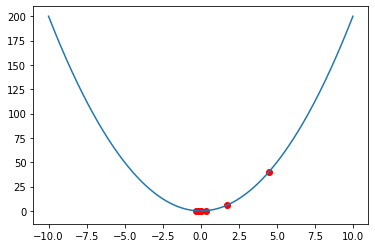

In [314]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x1,y1)
ax.scatter(ar, y, marker='o', color='red')

# Golden ratio method

In [315]:
phi = (5**(1/2)+1)/2
def gr(a, b, k):
    array = [] #empty array for roots
    minf = 0
    for i in range(k):
        x1 = b - (b-a)/phi
        x2 = a + (b-a)/phi
        if f(x1) > f(x2): #main condition
            a = x1
            array.append(a)  
        else:
            b = x2
            array.append(b)
        
    minf = (a+b)/2 #result
    return minf, array #the minimum and the list of the roots 

In [316]:
a = widgets.IntText(
    value = -1,
    description="left bound")
display(a)

#количество агентов типа 1
b = widgets.IntText(
    value = 1,
    description="right bound")
display(b)

#количество соседей
k = widgets.IntSlider(
    value=7,
    min=0,
    max=20,
    step=1,
    description='Iterations',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(k)

IntText(value=-1, description='left bound')

IntText(value=1, description='right bound')

IntSlider(value=7, continuous_update=False, description='Iterations', max=20)

# Visualization (golden ratio method)

In [319]:
x2 = np.linspace(-10, 10, num=1000)
y2 = list(map(f,x2))
minf, arg = gr(a.value, b.value, k.value)
yg = list(map(f,arg))

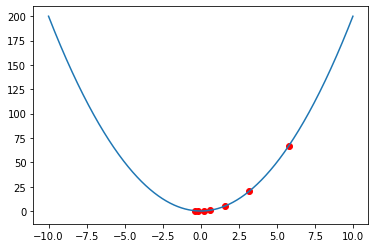

In [320]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x2,y2)
ax.scatter(arg, yg, marker='o', color='red')

# Fibonacci method

In [321]:
def fib(n):
    if n in (1, 2):
        return 1
    return fib(n - 1) + fib(n - 2)
    

def fib_m(a, b, k):
    array = [] #empty array for roots
    minf = 0

    for i in range(k,1,-1):
        x1 = a + (b-a)*(fib(k-2)/fib(k))
        x2 = a + (b-a)*(fib(k-1)/fib(k))
        y1 = f(x1)
        y2 = f(x2)
        if k == 1:
            minf = (x1+x2)/2
            break
        if f(x1) > f(x2): #main condition
            a = x1
            x1 = x2
            x2 = b - (x1 - a)
            y1 = y2
            y2 = f(x2)
            array.append(a)  
        else:
            b = x2
            x2 = x1
            x1 = a + (b - x2)
            y2 = y1
            y1 = f(x1)
            array.append(b)
        
    return minf, array #the minimum and the list of the roots 

In [308]:
a = widgets.IntText(
    value = -1,
    description="left bound")
display(a)

#количество агентов типа 1
b = widgets.IntText(
    value = 1,
    description="right bound")
display(b)

#количество соседей
k = widgets.IntSlider(
    value=7,
    min=0,
    max=20,
    step=1,
    description='Iterations',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(k)

IntText(value=-1, description='left bound')

IntText(value=1, description='right bound')

IntSlider(value=7, continuous_update=False, description='Iterations', max=20)

# Visualization (fibonacci method)

In [322]:
x2 = np.linspace(-10, 10, num=1000)
y2 = list(map(f,x2))
minf, arg = fib_m(a.value, b.value, k.value)
yg = list(map(f,arg))

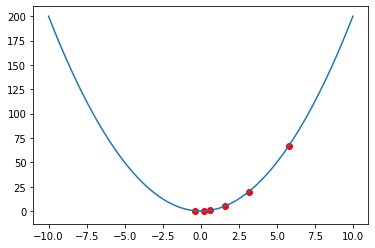

In [323]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x2,y2)
ax.scatter(arg, yg, marker='o', color='red')